In [28]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import cohen_kappa_score

In [29]:
#Read in data
w_basket_data = pd.read_csv('W_Basket_CMJ.csv')
w_basket_df= pd.DataFrame(w_basket_data)
w_basket_df.dropna()

#Printing the first 5 rows
print(w_basket_df.head())

                 TestId        Date      Time                  Name  Segment  \
0  Xj5YxalUvL4V3dKlEjVl  03/19/2025  14:14:29  5E9krELhCQ7yLvDGYsGo      NaN   
1  yVFT5nJ91FhYkFRHC0Z8  03/19/2025  14:13:00  5E9krELhCQ7yLvDGYsGo      NaN   
2  2UV2hDfm5NDmkuCjVsbl  03/11/2025  10:38:38  5E9krELhCQ7yLvDGYsGo      NaN   
3  uU2nvcJ74jje5Xj5beXP  03/11/2025  10:37:50  5E9krELhCQ7yLvDGYsGo      NaN   
4  AYm2iNAtPB6C09QOz6Qb  03/11/2025  10:36:13  5E9krELhCQ7yLvDGYsGo      NaN   

   Position                  Type  Excluded  Tags  System Weight  ...  \
0       NaN  Countermovement Jump       NaN   NaN        656.367  ...   
1       NaN  Countermovement Jump       NaN   NaN        657.101  ...   
2       NaN  Countermovement Jump       NaN   NaN        650.532  ...   
3       NaN  Countermovement Jump       NaN   NaN        650.637  ...   
4       NaN  Countermovement Jump       NaN   NaN        650.531  ...   

   Right Avg. Landing Force  L|R Landing Impulse Index     RSI    mRSI  \
0     

In [30]:
#Creating a new dataset with filtered metrics
metric_df= pd.DataFrame(w_basket_df[['TestId','Date', 'Time', 'Name', 'Jump Height', 'Avg. Braking Force', 'Avg. Propulsive Power',
                       'Time To Takeoff','Left Avg. Braking Force', 'Right Avg. Braking Force', 'L|R Avg. Braking Force', 'Peak Propulsive Power']])
print(metric_df.head())

                 TestId        Date      Time                  Name  \
0  Xj5YxalUvL4V3dKlEjVl  03/19/2025  14:14:29  5E9krELhCQ7yLvDGYsGo   
1  yVFT5nJ91FhYkFRHC0Z8  03/19/2025  14:13:00  5E9krELhCQ7yLvDGYsGo   
2  2UV2hDfm5NDmkuCjVsbl  03/11/2025  10:38:38  5E9krELhCQ7yLvDGYsGo   
3  uU2nvcJ74jje5Xj5beXP  03/11/2025  10:37:50  5E9krELhCQ7yLvDGYsGo   
4  AYm2iNAtPB6C09QOz6Qb  03/11/2025  10:36:13  5E9krELhCQ7yLvDGYsGo   

   Jump Height  Avg. Braking Force  Avg. Propulsive Power  Time To Takeoff  \
0       0.4163           1385.0155              2363.5456            0.622   
1       0.4044           1398.4769              2307.5014            0.603   
2       0.4003           1359.5469              2252.8850            0.693   
3       0.3627           1371.9685              2139.8421            0.653   
4       0.3967           1335.5441              2280.3264            0.632   

   Left Avg. Braking Force  Right Avg. Braking Force  L|R Avg. Braking Force  \
0                 665.97

Athlete Readiness Classification 

In [31]:
#Athlete Readiness Classification based on daily and overall jump height
def ready_day_classify(metric_df):
    readiness_day_results = []
    
    #Creating a list of the Athlete_IDs
    all_athletes = metric_df['Name'].unique()

    #Looping through each athlete
    for athlete in all_athletes:
        athlete_data = metric_df[metric_df['Name'] == athlete]
        overall_avg = athlete_data['Jump Height'].mean()

        #Creating a list of the jump test dates 
        all_days = metric_df['Date'].unique() #remove this if i want all values for each day
        
        #Looping through each test date 
        for date in all_days:
            daily_data = athlete_data[athlete_data['Date'] == date]
            daily_avg = daily_data['Jump Height'].mean() #change this for readiness score per day to create new function

            #Defining the percent change formula
            percent_change = abs((daily_avg -overall_avg)/ overall_avg) * 100 #change here too

            #Creating the readiness classification based on the percent change
            if percent_change < 10:
                readiness_score = 5
            elif 10 <= percent_change < 15:
                readiness_score = 4
            elif 15 <= percent_change < 20:
                readiness_score = 3
            elif 20 <= percent_change < 25:
                readiness_score = 2
            else:
                readiness_score = 1

            #Creating a list of the results 
            readiness_day_results.append({
                "Athlete_ID" : athlete,
                "Date" : date,
                "Daily_Avg" : daily_avg,
                "Overall_Avg" : overall_avg, 
                "Percent_Change" : percent_change,
                "Readiness_Percent_Score" : readiness_score
            })

    #Turning the results list into a dataframe 
    return pd.DataFrame(readiness_day_results)

readiness_day_df = ready_day_classify(metric_df)
readiness_day_df= readiness_day_df.dropna()


In [32]:
readiness_day_df

,Athlete_ID,Date,Daily_Avg,Overall_Avg,Percent_Change,Readiness_Percent_Score
0,5E9krELhCQ7yLvDGYsGo,03/19/2025,0.410350,0.371101,10.576487,4
1,5E9krELhCQ7yLvDGYsGo,03/11/2025,0.386567,0.371101,4.167622,5
2,5E9krELhCQ7yLvDGYsGo,03/10/2025,0.377300,0.371101,1.670546,5
3,5E9krELhCQ7yLvDGYsGo,03/05/2025,0.348100,0.371101,6.197941,5
4,5E9krELhCQ7yLvDGYsGo,03/04/2025,0.348567,0.371101,6.072189,5
...,...,...,...,...,...,...
851,w2W0rInDu6nt5ukwWIwL,08/26/2024,0.265867,0.276275,3.767534,5
852,w2W0rInDu6nt5ukwWIwL,08/23/2024,0.270350,0.276275,2.144758,5
853,w2W0rInDu6nt5ukwWIwL,08/22/2024,0.261200,0.276275,5.456670,5
855,w2W0rInDu6nt5ukwWIwL,01/30/2025,0.272550,0.276275,1.348451,5


In [33]:
#Athlete Readiness Classification based on daily and overall jump height
def ready_jump_classify(metric_df):
    readiness_jump_results = []
    
    #Creating a list of the Athlete_IDs
    all_athletes = metric_df['Name'].unique()

    #Looping through each athlete
    for athlete in all_athletes:
        athlete_data = metric_df[metric_df['Name'] == athlete]
        overall_avg = athlete_data['Jump Height'].mean()
        
        # Looping through each jump individually
        for jumps in range(len(athlete_data)):  
            jump = athlete_data.iloc[jumps][ 'Jump Height']  
            date = athlete_data.iloc[jumps]['Date']
            test_id = athlete_data.iloc[jumps]['TestId']

            #Defining the percent change formula
            percent_change = abs((jump -overall_avg)/ overall_avg) * 100 #change here too

            #Creating the readiness classification based on the percent change
            if percent_change < 10:
                readiness_score = 5
            elif 10 <= percent_change < 15:
                readiness_score = 4
            elif 15 <= percent_change < 20:
                readiness_score = 3
            elif 20 <= percent_change < 25:
                readiness_score = 2
            else:
                readiness_score = 1

            #Creating a list of the results 
            readiness_jump_results.append({
                "Athlete_ID" : athlete,
                "TestID" : test_id,
                "Date" : date,
                "Jump" : jump,
                "Overall_Avg" : overall_avg, 
                "Percent_Change" : percent_change,
                "Readiness_Percent_Score" : readiness_score
            })

    #Turning the results list into a dataframe 
    return pd.DataFrame(readiness_jump_results)

readiness_jump_df = ready_jump_classify(metric_df)
readiness_jump_df= readiness_jump_df.dropna()


In [34]:
#Creating a new dataframe with all the metrics and the readiness scores per jump 
athlete_df = pd.concat([metric_df, readiness_jump_df.drop(['Athlete_ID', 'TestID', 'Date', 'Jump'], axis=1)], axis=1)

In [35]:
#Athlete Readiness Classification Based on Quintiles 
jump_height_array = athlete_df['Jump Height'].values

q1 = np.percentile(athlete_df['Jump Height'].values, 20)
q2 = np.percentile(athlete_df['Jump Height'].values, 40)
q3 = np.percentile(athlete_df['Jump Height'].values, 60)
q4 = np.percentile(athlete_df['Jump Height'].values, 80)

quint_ready = []
for i, jump in enumerate(jump_height_array):
    if jump < q1:
        quint_ready.append(1)
    elif jump < q2:
        quint_ready.append(2)
    elif jump < q3:
        quint_ready.append(3)
    elif jump < q4:
        quint_ready.append(4)
    else:
        quint_ready.append(5)

athlete_df['Readiness_Quint_Score'] = quint_ready


Random Forest

In [36]:
#Setting up Random Forest Classifier 
X= athlete_df.drop(['TestId', 'Date', 'Time', 'Name', 'Jump Height', 'Percent_Change', 'Overall_Avg', 'Readiness_Percent_Score',
                    'Readiness_Quint_Score'], axis=1)
Y = athlete_df['Readiness_Quint_Score']
feature_list = X.columns


#Creating testing and training data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

#Creating the model and fitting the data
rf_model = RandomForestClassifier(n_estimators=50, max_features="sqrt", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [37]:
#Model predictions 
predictions = rf_model.predict(X_test)
predictions

array([5, 3, 3, 4, 4, 1, 2, 5, 1, 5, 4, 2, 3, 2, 1, 3, 3, 5, 4, 4, 2, 4,
       1, 2, 2, 3, 3, 5, 3, 3, 4, 1, 3, 5, 2, 4, 2, 4, 4, 3, 1, 4, 1, 5,
       3, 2, 4, 3, 5, 1, 2, 2, 2, 5, 3, 1, 2, 3, 2, 4, 1, 2, 4, 2, 3, 3,
       1, 5, 3, 1, 1, 1, 2, 1, 3, 1, 4, 4, 5, 4, 1, 1, 2, 3, 3, 1, 2, 5,
       2, 1, 1, 5, 5, 5, 3, 3, 3, 4, 3, 3, 2, 4, 1, 4, 2, 1, 4, 1, 1, 5,
       5, 4, 3, 2, 4, 2, 1, 1, 5, 2, 3, 4, 2, 1, 1, 4, 2, 4, 3, 1, 5, 2,
       2, 2, 1, 5, 1, 5, 1, 5, 2, 3, 4, 3, 5, 5, 1, 4, 1, 3, 2, 3, 5, 2,
       5, 4, 4, 3, 2, 1, 2, 4, 3, 1, 5, 2, 4, 3, 4, 2, 3, 3, 5, 5, 4, 1,
       4, 5, 5, 3, 5, 5, 3, 2, 1, 3, 4, 1, 5, 2, 2, 4, 2, 1, 5, 3, 3, 2,
       4, 5, 5, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 2, 5, 3, 2, 2, 4, 5, 5,
       2, 4, 1, 4, 5, 2, 3, 5, 2, 4, 4, 2, 5, 3, 5, 4, 2, 2, 5, 2, 1, 1,
       3, 1, 3, 3, 5, 4, 2, 3, 4, 5, 1, 2, 1, 3, 2, 5, 1, 1, 5, 4, 3, 2,
       5, 2, 5, 5, 1, 1, 5, 4, 4, 2, 2, 5, 1, 4, 3, 5, 5, 2, 2, 2, 2, 5,
       3, 3, 1, 1, 2, 3, 3, 1, 4, 4, 3, 3, 2, 3, 3,

In [38]:
#Quadratic Weighted Kappa
kappa_rf = cohen_kappa_score(y_test, predictions, weights="quadratic")
print(kappa_rf)

0.8739212473604202


Text(77.92222222222227, 0.5, 'Predicted label')

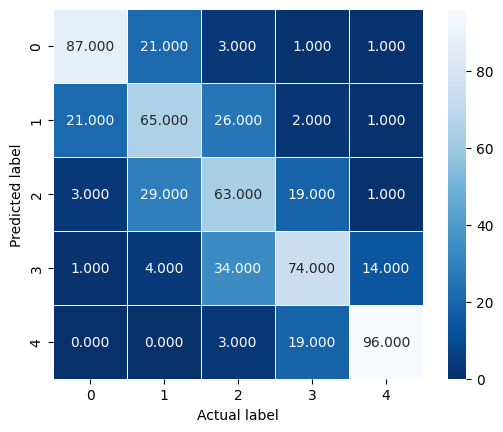

In [39]:
conf = confusion_matrix(y_test, predictions)
sns.heatmap(conf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Actual label') 
plt.ylabel('Predicted label')

Feature Importance

In [40]:
rf_model.predict_proba(X_test)

array([[0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.22, 0.32, 0.4 , 0.06, 0.  ],
       [0.18, 0.32, 0.38, 0.04, 0.08],
       ...,
       [0.02, 0.24, 0.74, 0.  , 0.  ],
       [0.02, 0.2 , 0.56, 0.2 , 0.02],
       [0.  , 0.06, 0.2 , 0.64, 0.1 ]], shape=(588, 5))

In [41]:
importances = rf_model.feature_importances_

<BarContainer object of 7 artists>

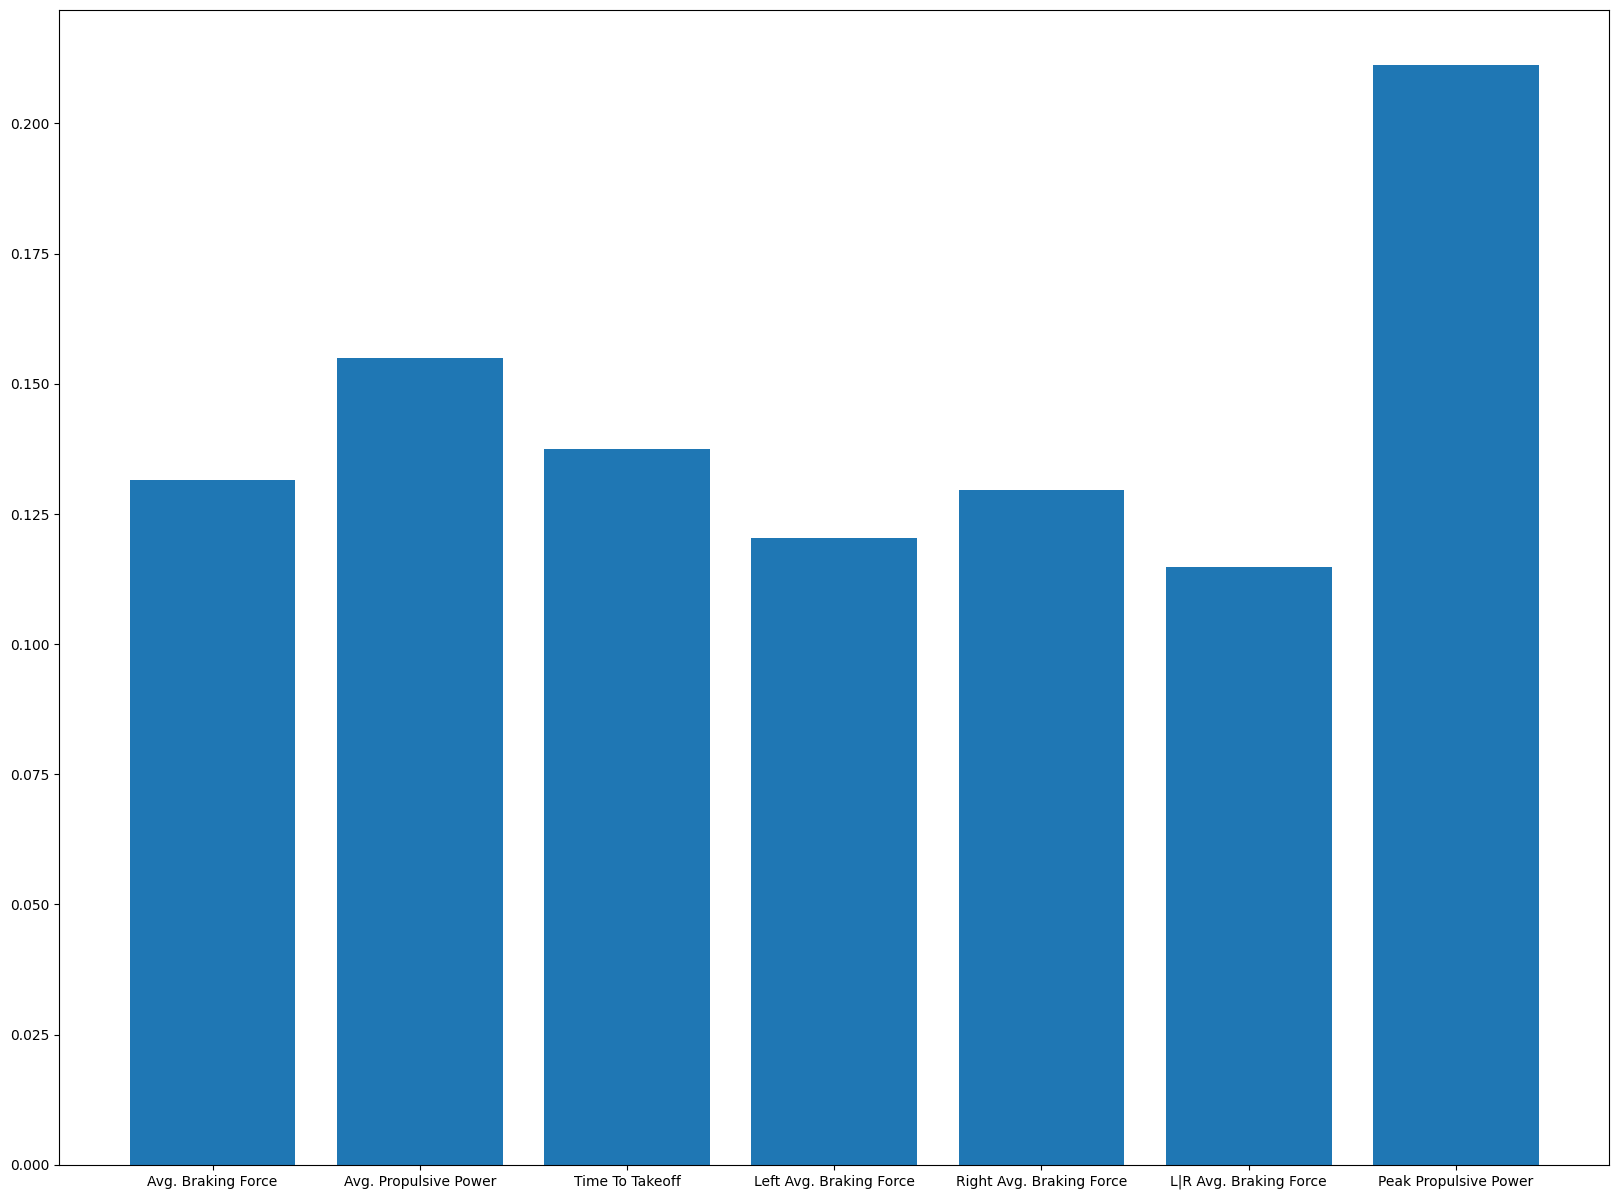

In [42]:
plt_2 = plt.figure(figsize=(20, 15))
plt.bar(feature_list, importances)

Feature Importance Visualizations

Text(0.5, 1.0, 'Peak Propulsive Power by Readiness Quintiles')

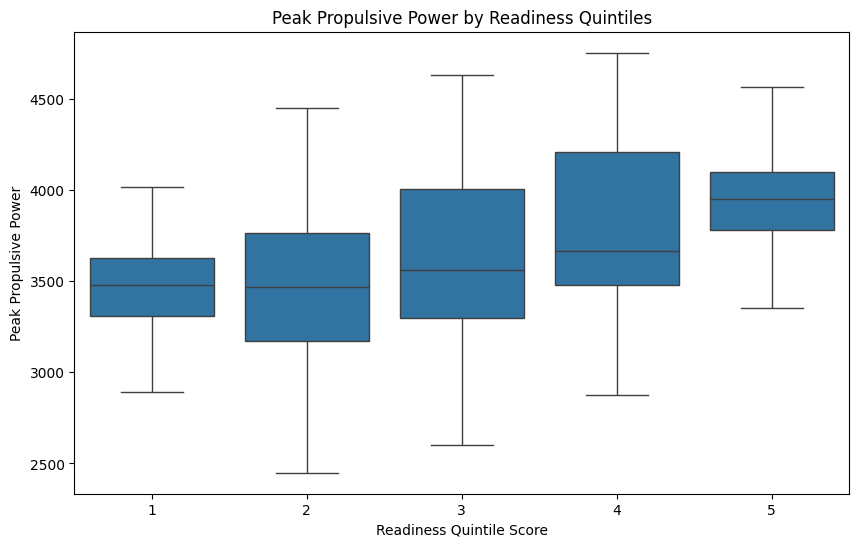

In [43]:
#Box Plot for Peak Propulsive Power by Athlete Readiness 
plt.figure(figsize=(10,6))
sns.boxplot(data=athlete_df, x="Readiness_Quint_Score", y="Peak Propulsive Power", showfliers=False)
plt.xlabel("Readiness Quintile Score")
plt.ylabel("Peak Propulsive Power")
plt.title("Peak Propulsive Power by Readiness Quintiles")

Text(0.5, 1.0, 'Distribution of Peak Propulsive Power by Readiness Quintile')

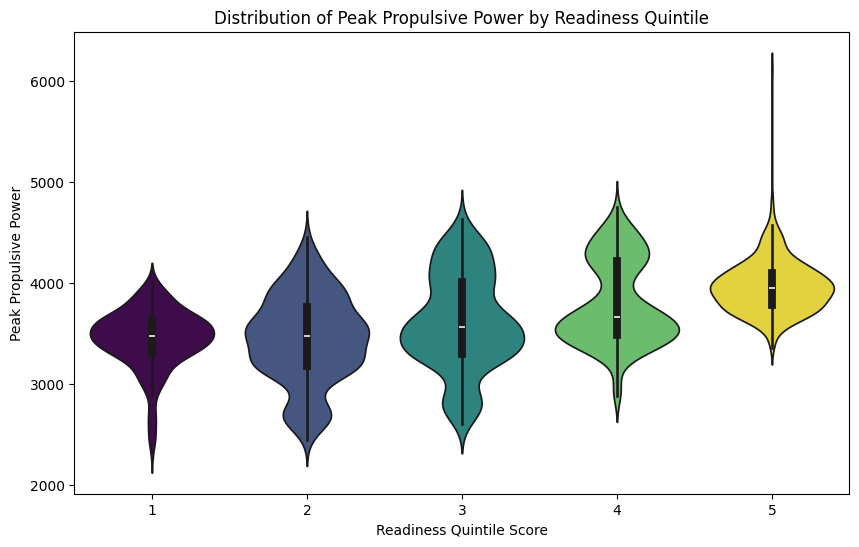

In [44]:
#Violin Distribution Plot for Peak Propulsive Power by Athlete Readiness 
plt.figure(figsize=(10,6))
sns.violinplot(data=athlete_df, x="Readiness_Quint_Score", y="Peak Propulsive Power", hue="Readiness_Quint_Score", palette="viridis", legend=False)

plt.xlabel("Readiness Quintile Score")
plt.ylabel("Peak Propulsive Power")
plt.title("Distribution of Peak Propulsive Power by Readiness Quintile")

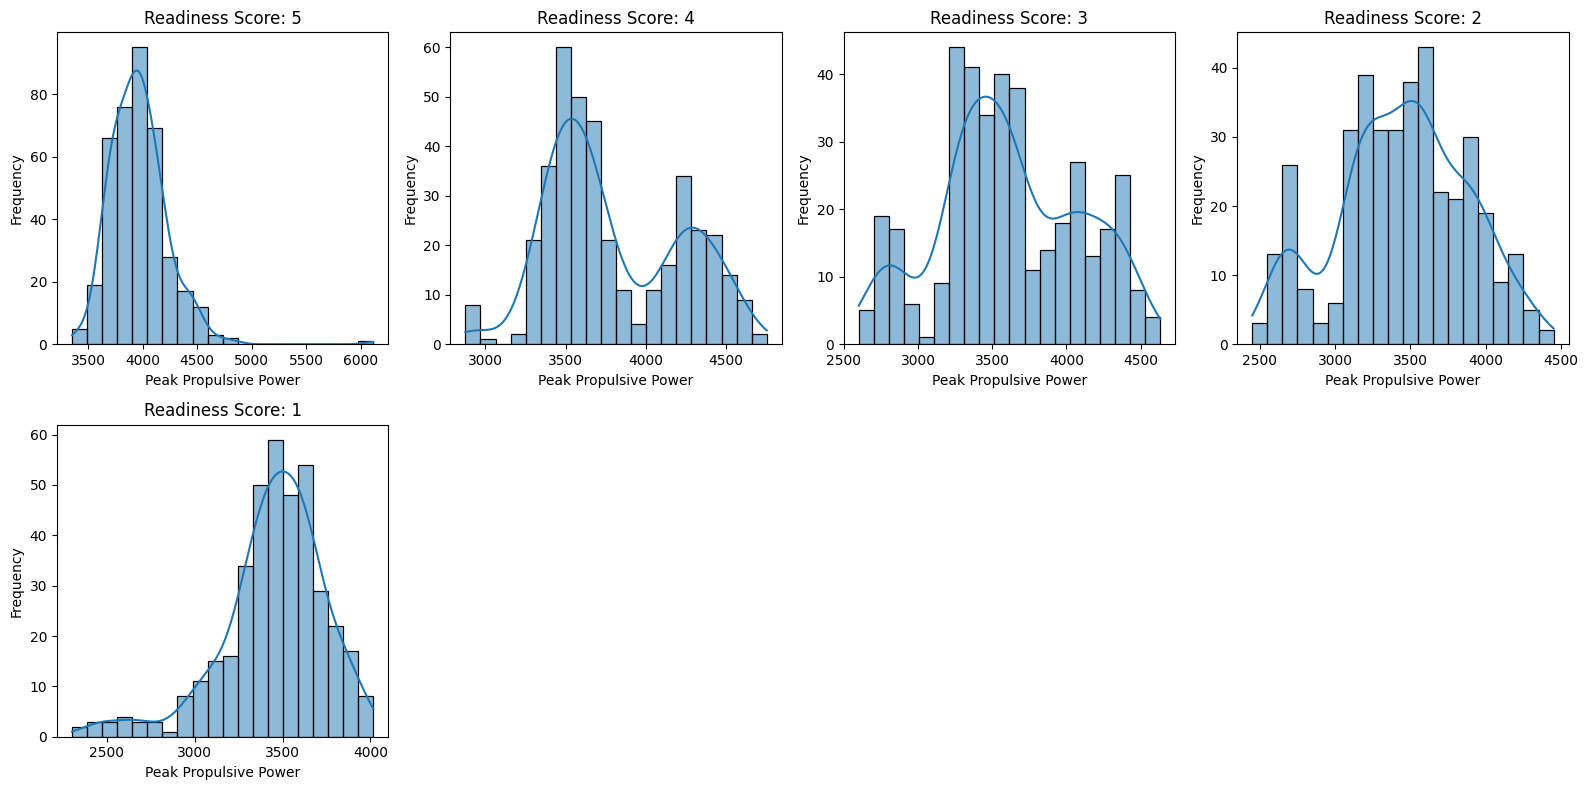

In [45]:
#Peak Propulsive Power Distribution for each Readiness Score 
# Get unique scores
scores = athlete_df['Readiness_Quint_Score'].unique()
num_scores = len(scores)

# Set up subplots (adjust rows/cols based on the number of athletes)
rows = (num_scores // 4) + (num_scores % 4 > 0)  # 4 columns per row
fig, axes = plt.subplots(rows, 4, figsize=(16, rows * 4))
axes = axes.flatten()  # Flatten in case there are extra subplots

# Loop through each score and create a histogram
for i, score in enumerate(scores):
    ax = axes[i]
    sns.histplot(data=athlete_df[athlete_df['Readiness_Quint_Score'] == score], 
                 x='Peak Propulsive Power', kde=True, bins=20, ax=ax)
    ax.set_title(f'Readiness Score: {score}')
    ax.set_xlabel('Peak Propulsive Power')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()